In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from ga_prototype import GA

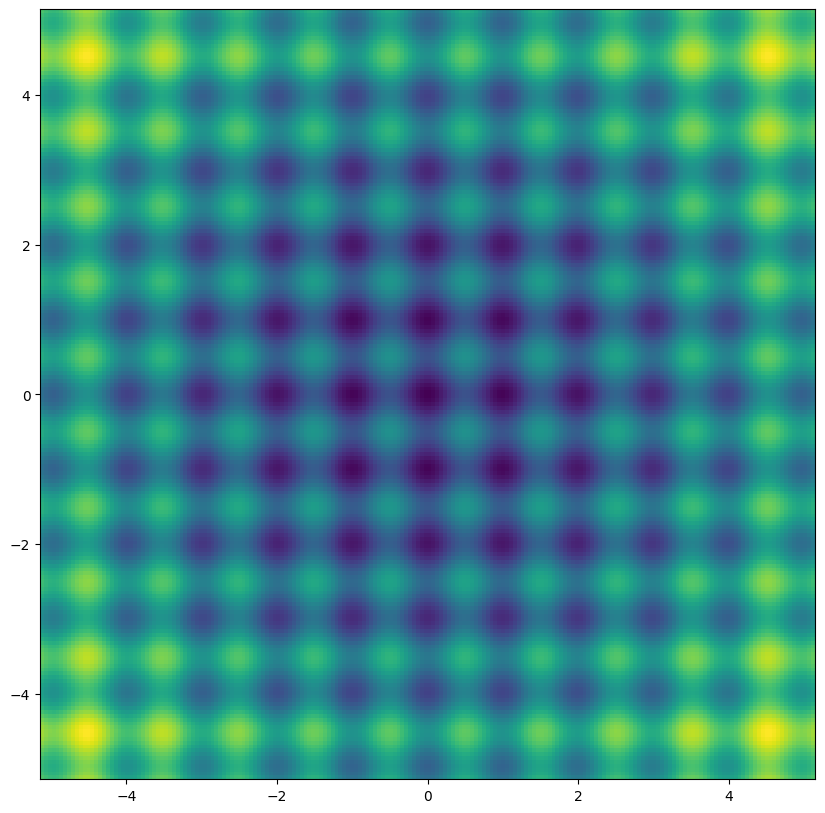

In [3]:
class Rastrigin():

    def __get_error_surface_volume(self, *X, **kwargs):
        A = kwargs.get('A', 10)
        return A + sum([(np.square(x) - A * np.cos(2 * np.pi * x)) for x in X])


    def evaluate(self, position):
        A = 10
        return A + np.sum([(np.square(x) - A * np.cos(2 * np.pi * x)) for x in position])

    
    def get_surface(self, resolution=200, bound=5.12):
        
        X = np.linspace(-bound, bound, resolution)    
        Y = np.linspace(-bound, bound, resolution)  
        
        X, Y = np.meshgrid(X, Y)
        Z = self.__get_error_surface_volume(X, Y, A=10)
        return np.stack((X, Y, Z))


problem = Rastrigin()
surface = problem.get_surface()

fig = plt.figure(figsize=(10, 10))
plt.cla()
plt.pcolormesh(surface[0], surface[1], surface[2])
plt.show()

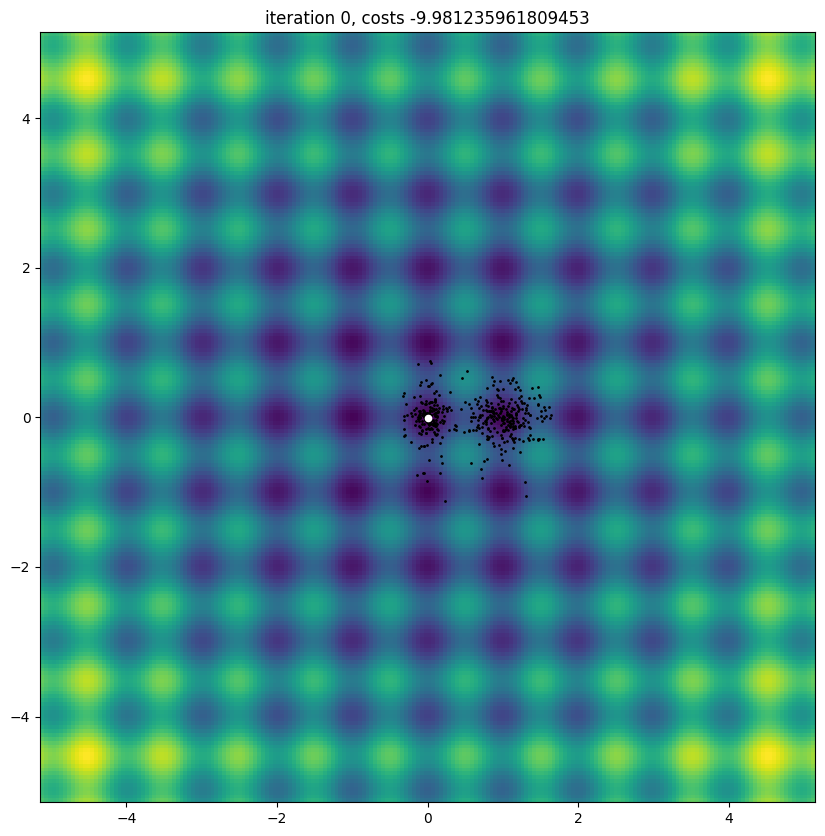

In [4]:
# A way of plotting each step of the optimisation process.
def plot(surface, positions, best_fitness, best_position, iteration):
    plt.cla()
    
    # Plot the feature / error surface.
    plt.pcolormesh(surface[0], surface[1], surface[2])

    # Plot all of the genepool.
    x, y = zip(*positions)
    plt.scatter(x, y, 1, 'k', edgecolors='face')
    
    # Plot the best gene.
    plt.scatter(best_position[0], best_position[1], 20, 'w', edgecolors='face')

    # Add the title to the plot.
    title = "iteration {}, costs {}".format(iteration, best_fitness)
    plt.title(title)

    
# Each time this function is ran, the optimisation process is furthered a step.
def run(iteration):
  
    # Get the rastrigin error surface.
    surface = function.get_surface()
    
    # Get the gene pool.
    positions = ga.get_solutions()
    
    # Evaluate the fitnesses on the rastrigin surface
    fitnesses = [function.evaluate(pos) for pos in positions]
    
    # Inform the GA of the genepool's performance
    ga.set_fitnesses(fitnesses)
    
    # Get the best gene
    best_position, best_fitness = ga.get_best()

    # Plot the optimsation
    plot(surface, positions, best_fitness, best_position, iteration)


# Genetic Algorithm parameters 
elitism = 0.1
population_size = 500
mutation_rate = 0.8
mutation_sigma = 0.1
mutation_decay = 0.999
mutation_limit = 0.01
amount_optimisation_steps = 250
dna_bounds = (-5.11, 5.11)
dna_start_position = [4.8, 4.8]

# Construct the test function
function = Rastrigin()

# Construct the GA
ga = GA(len(dna_start_position),
        dna_bounds,
        dna_start_position,
        elitism,
        population_size,
        mutation_rate,
        mutation_sigma,
        mutation_decay,
        mutation_limit)

# Create the matplotlib figure
fig = plt.figure(figsize=(10, 10))

# See this on making gifs with matplotlib:
# https://matplotlib.org/api/animation_api.html
anim = animation.FuncAnimation(fig, run, frames=amount_optimisation_steps)
anim.save('mp4_results/Rastrigin_2d.mp4', fps=15)

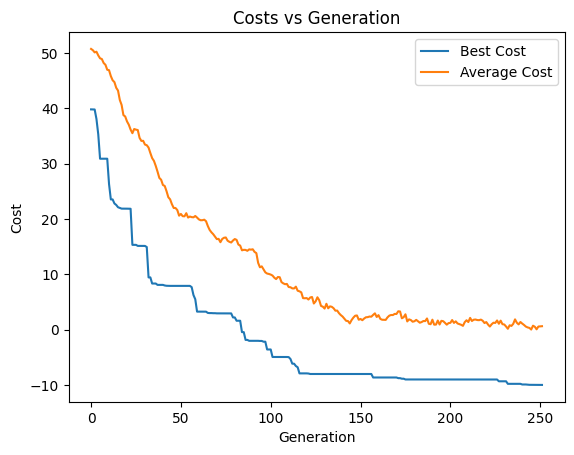

In [5]:
ga.plot_fitness()

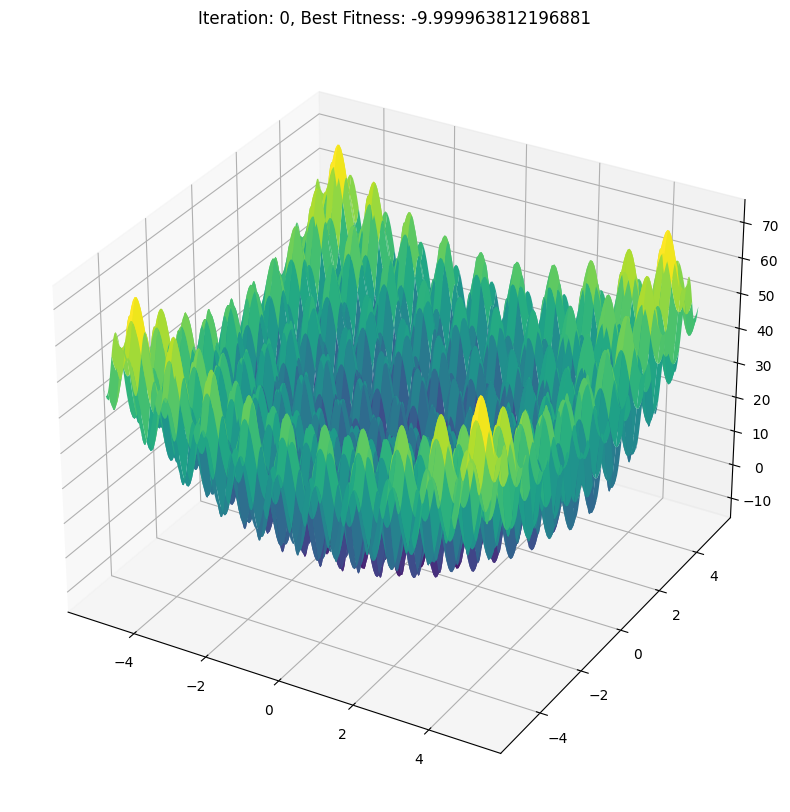

In [6]:
def plot(surface, positions, best_fitness, best_position, iteration):
    ax.clear()
    
    # Plot the feature / error surface in 3D.
    ax.plot_surface(surface[0], surface[1], surface[2], cmap='viridis', edgecolor='none')

    # Plot all of the genepool.
    x, y = zip(*positions)
    z = [function.evaluate(pos) for pos in positions]
    ax.scatter(x, y, z, c='k', s=1)
    
    # Plot the best gene.
    best_z = function.evaluate(best_position)
    ax.scatter(best_position[0], best_position[1], best_z, c='r', s=20)

    # Add the title to the plot.
    title = "Iteration: {}, Best Fitness: {}".format(iteration, best_fitness)
    ax.set_title(title)


def run(iteration):
    # Get the Rastrigin error surface.
    surface = function.get_surface()
    
    # Get the gene pool.
    positions = ga.get_solutions()
    
    # Evaluate the fitnesses on the Rastrigin surface.
    fitnesses = [function.evaluate(pos) for pos in positions]
    
    # Inform the GA of the genepool's performance.
    ga.set_fitnesses(fitnesses)
    
    # Get the best gene.
    best_position, best_fitness = ga.get_best()

    # Plot the optimization.
    plot(surface, positions, best_fitness, best_position, iteration)


# Genetic Algorithm parameters.
elitism = 0.1
population_size = 500
mutation_rate = 0.8
mutation_sigma = 0.1
mutation_decay = 0.999
mutation_limit = 0.01
amount_optimization_steps = 250
dna_bounds = (-5.11, 5.11)
dna_start_position = [4.8, 4.8]

# Construct the test function.
function = Rastrigin()

# Construct the GA.
ga = GA(dna_size=len(dna_start_position),
        dna_bounds=dna_bounds,
        dna_start_position=dna_start_position,
        elitism=elitism,
        population_size=population_size,
        mutation_rate=mutation_rate,
        mutation_sigma=mutation_sigma,
        mutation_decay=mutation_decay,
        mutation_limit=mutation_limit)

# Create the matplotlib figure and 3D axis.
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Animation update function.
def update(frame):
    run(frame)

# Create the animation.
anim = animation.FuncAnimation(fig, update, frames=amount_optimization_steps, interval=200)

# Set up the plot and save the animation.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('CustomFunc Optimization')
anim.save('mp4_results/Rastrigin_3d.mp4', writer='ffmpeg', fps=15)


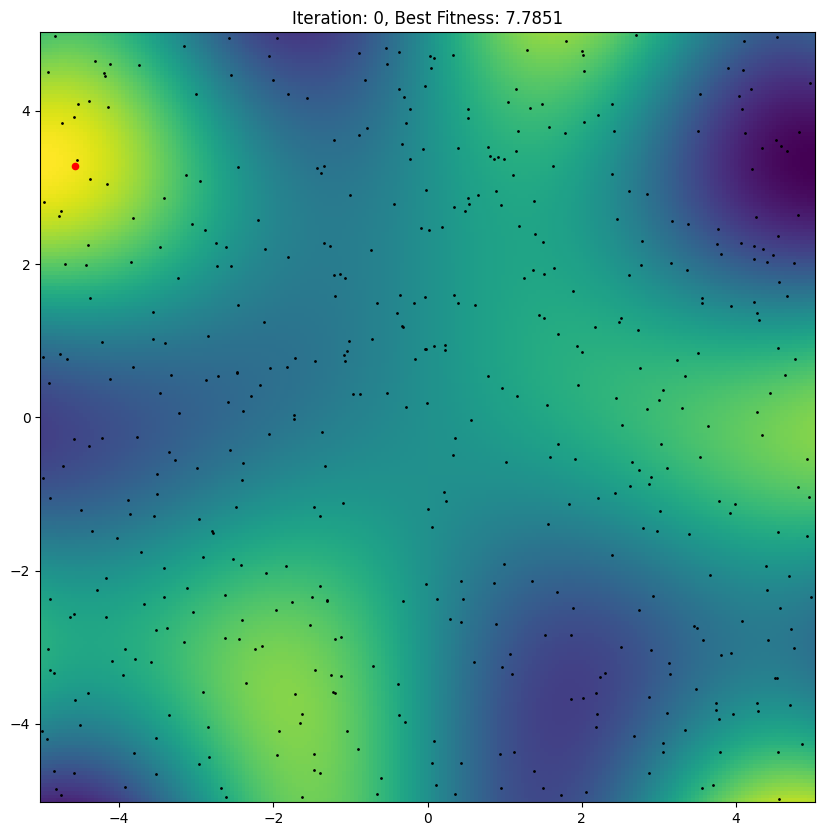

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Function2D():
    def evaluate(self, x, y):
        return y * np.sin(x) + x * np.cos(y)

    def get_surface(self, resolution=200, bound=5):
        X = np.linspace(-bound, bound, resolution)
        Y = np.linspace(-bound, bound, resolution)
        X, Y = np.meshgrid(X, Y)
        Z = self.evaluate(X, Y)
        return np.stack((X, Y, Z))

function = Function2D()

class GA():
    def __init__(self, population_size):
        self.population = np.random.uniform(low=-5, high=5, size=(population_size, 2))
        self.fitnesses = np.zeros(population_size)
        self.best_dna = None
        self.best_fitness = None

    def get_solutions(self):
        return self.population

    def set_fitnesses(self, fitnesses):
        assert len(fitnesses) == len(self.fitnesses)
        self.fitnesses = np.array(fitnesses)
        best_index = np.argmax(self.fitnesses)
        self.best_dna = self.population[best_index]
        self.best_fitness = self.fitnesses[best_index]

    def get_best(self):
        return self.best_dna, self.best_fitness

def plot(surface, positions, best_fitness, best_position, iteration):
    plt.cla()
    plt.pcolormesh(surface[0], surface[1], surface[2], cmap='viridis')
    plt.scatter(positions[:, 0], positions[:, 1], c='k', s=1)
    plt.scatter(best_position[0], best_position[1], c='r', s=20)
    plt.title("Iteration: {}, Best Fitness: {:.4f}".format(iteration, best_fitness))

def run(iteration):
    surface = function.get_surface()
    positions = ga.get_solutions()
    fitnesses = [function.evaluate(pos[0], pos[1]) for pos in positions]
    ga.set_fitnesses(fitnesses)
    best_position, best_fitness = ga.get_best()
    plot(surface, positions, best_fitness, best_position, iteration)

# Genetic Algorithm parameters.
population_size = 500
amount_optimization_steps = 250

# Construct the GA.
ga = GA(population_size)

# Create the matplotlib figure.
fig = plt.figure(figsize=(10, 10))

# Animation update function.
def update(frame):
    run(frame)

# Create the animation.
anim = animation.FuncAnimation(fig, update, frames=amount_optimization_steps, interval=200)

# Set up the plot and save the animation.
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Optimization of y * sin(x) + x * cos(y)')
anim.save('function2d_ga.mp4', writer='ffmpeg', fps=15)

In [15]:
np.log(10)/np.log(2)

3.3219280948873626

In [16]:
np.log(2)/np.log(10)

0.30102999566398114

In [24]:
print(np.log(0.01)/np.log(0.01))
print(np.log(0.01)/np.log(0.99))
print(np.log(0.01)/np.log(0.01))
print(np.log(0.99)/np.log(0.99))

1.0
458.2105765533884
1.0
1.0


In [30]:
print(np.log(0.0001))
print(np.log(0.9999))

-9.210340371976182
-0.00010000500033334732


In [26]:
print(np.log(0.01)/np.log(0.99))

458.2105765533884


/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_24808/1299323009.py:4: RuntimeWarning: divide by zero encountered in log
  cost = np.log(x_base)/np.log(x_new)
/var/folders/b7/kcj1zfy15d35hgd16vscfs0r0000gn/T/ipykernel_24808/1299323009.py:4: RuntimeWarning: divide by zero encountered in divide
  cost = np.log(x_base)/np.log(x_new)


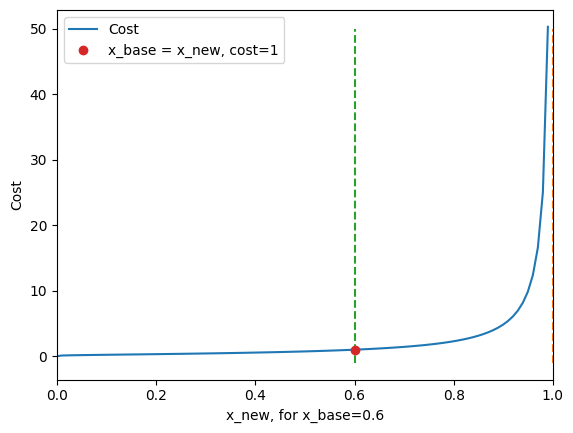

In [98]:
x_base = 0.6
x_new = np.linspace(0, 1, 100)

cost = np.log(x_base)/np.log(x_new)
plt.plot(x_new, cost, label='Cost')

plt.plot([1, 1], [-1, 50], '--')
plt.plot([x_base, x_base], [-1, 50], '--')

plt.plot(x_base, 1, 'o', label='x_base = x_new, cost=1')
plt.xlim(0, 1)
plt.xlabel(f'x_new, for x_base={x_base}')
plt.ylabel('Cost')
plt.legend()
plt.show()


3.3219280948873626
-2.2755881127582827


# log function boundary
 max => inf (x -> 0) 

 min => 0 (x-> +inf)